In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!wget https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv
!wget https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv

--2020-04-06 16:33:44--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 296146 (289K) [text/plain]
Saving to: ‘cases-brazil-cities-time.csv’

cases-brazil-cities 100%[===================>] 289.21K   928KB/s    in 0.3s    

2020-04-06 16:33:46 (928 KB/s) - ‘cases-brazil-cities-time.csv’ saved [296146/296146]

--2020-04-06 16:33:49--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

In [4]:
df_municipio = pd.read_csv('cases-brazil-cities-time.csv')
display(df_municipio.tail())

df_estado = pd.read_csv('cases-brazil-states.csv')
display(df_estado.tail())

,date,country,state,city,ibgeID,newCases,totalCases
6166,2020-04-05,Brazil,PR,Ibema/PR,4109757,0,1
6167,2020-04-05,Brazil,PR,Palmas/PR,4117602,0,1
6168,2020-04-05,Brazil,PR,Pinhão/PR,4119301,0,1
6169,2020-04-05,Brazil,PR,Rolândia/PR,4122404,0,1
6170,2020-04-05,Brazil,TOTAL,TOTAL,0,904,11282


,date,country,state,city,deaths,newCases,totalCases
672,2020-04-05,Brazil,RN,TOTAL,7,27,242
673,2020-04-05,Brazil,MS,TOTAL,1,3,65
674,2020-04-05,Brazil,SE,TOTAL,3,0,32
675,2020-04-05,Brazil,PI,TOTAL,4,0,24
676,2020-04-05,Brazil,TOTAL,TOTAL,486,904,11282


## Análise por Município
Não há informação de óbitos, apenas casos por dia e novos casos.

In [5]:
ts = {}
for municipio in np.unique(df_municipio['city'].to_numpy()):
  ts[municipio] = df_municipio[df_municipio['city'].str.contains(municipio)][['date', 'city','newCases', 'totalCases']]

ultimo_dia = df_municipio[df_municipio['date'].str.contains('2020-04-05')]
ultimo_dia.sort_values(by='totalCases', axis=0, inplace=True, ascending=False)
display(ultimo_dia.head(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,country,state,city,ibgeID,newCases,totalCases
6170,2020-04-05,Brazil,TOTAL,TOTAL,0,904,11282
5547,2020-04-05,Brazil,SP,São Paulo/SP,3550308,116,3612
5550,2020-04-05,Brazil,RJ,Rio de Janeiro/RJ,3304557,86,1068
5569,2020-04-05,Brazil,CE,Fortaleza/CE,2304400,23,704
5551,2020-04-05,Brazil,DF,Brasília/DF,5300108,12,468
5563,2020-04-05,Brazil,AM,Manaus/AM,1302603,96,379
5571,2020-04-05,Brazil,MG,Belo Horizonte/MG,3106200,25,262
5555,2020-04-05,Brazil,RS,Porto Alegre/RS,4314902,13,254
5562,2020-04-05,Brazil,BA,Salvador/BA,2927408,29,244
5558,2020-04-05,Brazil,PR,Curitiba/PR,4106902,19,172


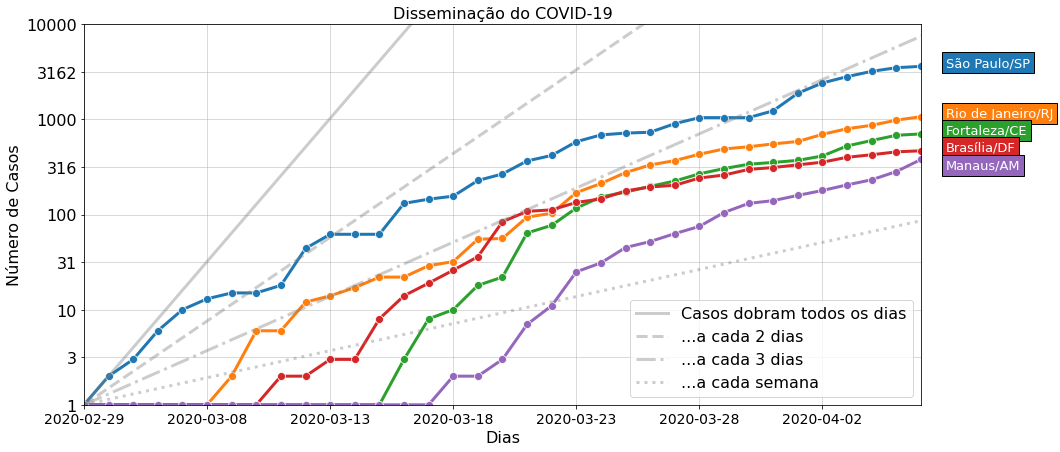

In [47]:
k = 5
topk = ultimo_dia['city'].to_numpy()[1:k+1]

plt.figure(figsize=(15, 7))
maxcases = len(ts[topk[0]])

for municipio in topk:
  cases = ts[municipio]['totalCases']
  dif = maxcases - len(cases)
  
  y = np.log10(cases).tolist()

  p = sns.lineplot(np.arange(maxcases), [0]*dif + y, label=None, linewidth=3, marker='o', markersize=8)
  if municipio == "Manaus/AM": y[-1] -=0.1
  plt.text(maxcases, y[-1] , municipio, color='w', rotation=0, fontsize=13,
           bbox=dict(facecolor=p.get_lines()[-1].get_color()) )

name = 'Casos dobram todos os dias'
x = np.linspace(0, 35, 20)
y = 2**x
plt.plot(x, np.log10(y), label = name, linewidth=3, linestyle='solid', alpha=0.40, color='gray')
name = '...a cada 2 dias'
y = 1.5**x
plt.plot(x, np.log10(y), label = name, linewidth=3,linestyle='dashed', alpha=0.40, color='gray' )
name = '...a cada 3 dias'
y = 1.3**x
plt.plot(x, np.log10(y), label = name, linewidth=3,linestyle='-.', alpha=0.40, color='gray' )
plt.ylim(0,4)
name = '...a cada semana'
y = 1.14**x
plt.plot(x, np.log10(y), label = name, linewidth=3, linestyle='dotted', alpha=0.40, color='gray' )

plt.ylim(0,4)
plt.xlim(0, maxcases-1)
plt.legend(fontsize=16, loc=4)
plt.grid(True, alpha=0.6)

ticks = ['{0}'.format(int(10**l)) for l in  np.linspace(0., 4., 9) ]
plt.yticks(np.linspace(0., 4., 9), ticks , fontsize=16)
plt.xticks(np.arange(0,maxcases,5), ts[topk[0]]['date'][1::5], fontsize=14, rotation=0)
plt.ylabel('Número de Casos', fontsize=16)
plt.xlabel('Dias', fontsize=16)
plt.title('Disseminação do COVID-19', fontsize=16)
plt.savefig('municipios.png', format='png', bbox_inches='tight', dpi=150)
plt.show()

## Análise por Estado
### Letalidade

In [206]:
df_estado['letalidade'] = (df_estado['deaths'])/(df_estado['totalCases'])
df_estado_sortl = df_estado.sort_values('letalidade', axis=0, ascending=True)
ultimo_dia = df_estado_sortl[df_estado_sortl['date'].str.contains('2020-04-05')]
ultimo_dia.tail(10)

,date,country,state,city,deaths,newCases,totalCases,letalidade
676,2020-04-05,Brazil,TOTAL,TOTAL,486,904,11282,0.043077
652,2020-04-05,Brazil,RJ,TOTAL,64,148,1394,0.045911
649,2020-04-05,Brazil,SP,TOTAL,275,154,4620,0.059524
666,2020-04-05,Brazil,AP,TOTAL,2,3,32,0.062500
669,2020-04-05,Brazil,RO,TOTAL,1,3,14,0.071429
654,2020-04-05,Brazil,AL,TOTAL,2,5,28,0.071429
674,2020-04-05,Brazil,SE,TOTAL,3,0,32,0.093750
657,2020-04-05,Brazil,PE,TOTAL,21,25,201,0.104478
671,2020-04-05,Brazil,PB,TOTAL,4,1,35,0.114286
675,2020-04-05,Brazil,PI,TOTAL,4,0,24,0.166667


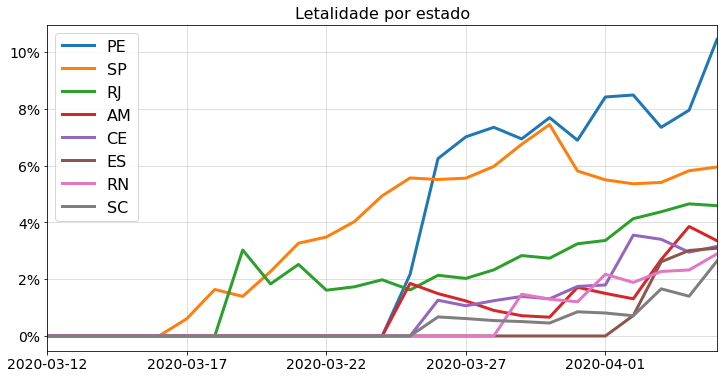

In [210]:
k = 15
topk = ultimo_dia['state'].to_numpy()[-k:][::-1]

plt.figure(figsize=(12, 6))
maxcases = len(df_estado[df_estado['state']=='SP'])
for state in topk:
  if state == 'TOTAL': continue
  state_df = df_estado[df_estado['state']==state]

  dif = maxcases - len(state_df)
  if state_df['totalCases'].to_numpy()[-1] < 100: continue
  letalidade = state_df['letalidade']

  p = sns.lineplot(np.arange(maxcases)[10:], ([0]*dif  + letalidade.tolist())[10:], label=state, linewidth=3)


ticks = ['{:.0f}%'.format(t*100) for t in np.linspace(0, 0.1, 6)]
plt.yticks(np.linspace(0, 0.1, 6), ticks, fontsize=14)

dates = df_estado[df_estado['state']=='SP']['date'].to_numpy()
plt.xticks(np.arange(10,maxcases,5), dates[10::5], fontsize=14, rotation=0)
plt.xlim(10, maxcases-1)
plt.legend(fontsize=16, loc=2)

plt.grid(True, alpha=0.5)
plt.title('Letalidade por estado', fontsize=16)
plt.savefig('letalidade-estado.png', format='png', dpi=150, bbox_inches='tight')
plt.show()